In [ ]:
"Ultra Dense Indoor MaMIMO CSI Dataset"

import os
from skimage import io
import keras
from keras import layers
from numpy.random import permutation
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib
import matplotlib.pyplot as plt
import random
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow
from numpy.random import seed
import random as rd

def pre_process(X):
    X = X.flatten()
    return X

def re_process(X):
    X = X.reshape(64,100)
    return X

def plot_two_curves(x, y, t = ""):
    plt.figure()
    plt.title(t)
    x_mean = sum(x)/len(x)
    y_mean = sum(y)/len(y)
    plt.plot(range(len(x)), x, label = 'original | mean'+str(x_mean))
    plt.plot(range(len(y)), y, label = 'decoded | mean'+str(y_mean))
    plt.legend()
    plt.show()

samples_path = 'DIS_lab_LoS/samples/'
ant_pos = np.load('DIS_lab_LoS/antenna_positions.npy')
user_pos = np.load('DIS_lab_LoS/user_positions.npy')
samples = []
filename = 'channel_measurement_'

(x_train, _), (_,_) = mnist.load_data()

x_train = x_train/255.0
x_train = x_train.reshape((len(x_train)), 784)

n = '000000'
for i in range(5000):
    samples.append(np.load(samples_path+filename+n+'.npy'))
    samples[i] = pre_process(samples[i])
    n = n[0:len(n) - len(str(i))] + str(i)

samples = np.array(samples)

model = Sequential()
model.add(keras.Input(shape=(6400, )))
model.add(layers.Dense(6100, activation = 'relu', name = 'h1'))
model.add(layers.Dense(6400, activation = 'sigmoid', name = 'out'))
model.compile(optimizer = 'adam', loss = 'mse')

hist = model.fit(samples, samples, epochs = 10, batch_size = 64)

decs = model.predict(samples)

samples = samples.reshape(len(samples), 64, 100)
decs = decs.reshape(len(decs), 64, 100)

plot_two_curves(samples[10][0], decs[10][0])



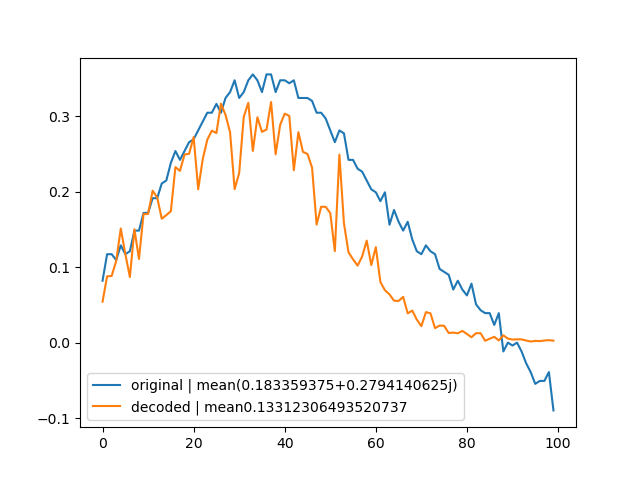